# Analysis of SAAF vs NDA

In [1]:
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
import itertools
import sys
sys.path.append('../src')

from formulations.nda import NDA
from formulations.saaf import SAAF
from formulations.diffusion import Diffusion
from fe import *
from materials import Materials
from problem import Problem
#from plot import plot, plot_1d
from solvers import Solver

## Setup Problem

In [109]:
mesh = 'symmetric-8'
mat = 'scattering1g'

In [110]:
nodefile = "../test/test_inputs/" + mesh + ".node"
elefile = "../test/test_inputs/" + mesh + ".ele"
matfile = "../test/test_inputs/" + mat + ".mat"
grid = FEGrid(nodefile, elefile)
mats = Materials(matfile)
num_elts = grid.num_elts
num_groups = mats.get_num_groups()
source = np.ones((num_groups, num_elts))

### Diffusion

In [97]:
op = Diffusion(grid, mats)
solver = Solver(op)

In [98]:
phi_diffusion = solver.solve(source)

Within-Group Iteration:  0
Norm:  2.049786148896468
Within-Group Iteration:  1
Norm:  0.0
Number of Within-Group Iterations:  2
Final Phi Norm:  0.0
Runtime: 1.62755 seconds


### NDA

In [99]:
op = NDA(grid, mats)
solver = Solver(op)

In [100]:
phi_nda = solver.solve(source)

Within-Group Iteration:  0
Norm:  0.9134762335436984
Within-Group Iteration:  1
Norm:  0.0037501522316918203
Within-Group Iteration:  2
Norm:  5.380971435483222e-05
Number of Within-Group Iterations:  3
Final Phi Norm:  5.380971435483222e-05
Runtime: 16.76664 seconds


### SAAF

In [111]:
op = SAAF(grid, mats)
solver = Solver(op)

In [112]:
phi_saaf = solver.solve(source)

Within-Group Iteration:  0
Norm:  0.7953635168939963
Within-Group Iteration:  1
Norm:  0.2719009983899034
Within-Group Iteration:  2
Norm:  0.16958901204539797
Within-Group Iteration:  3
Norm:  0.12069985204738619
Within-Group Iteration:  4
Norm:  0.08908026783562996
Within-Group Iteration:  5
Norm:  0.06967835898922398
Within-Group Iteration:  6
Norm:  0.05500265149492708
Within-Group Iteration:  7
Norm:  0.043729439548992916
Within-Group Iteration:  8
Norm:  0.03553333173985158
Within-Group Iteration:  9
Norm:  0.029081715534528357
Within-Group Iteration:  10
Norm:  0.023624467838873
Within-Group Iteration:  11
Norm:  0.018969978083786476
Within-Group Iteration:  12
Norm:  0.015084325790013387
Within-Group Iteration:  13
Norm:  0.011897570188188529
Within-Group Iteration:  14
Norm:  0.009321579672109807
Within-Group Iteration:  15
Norm:  0.00726355896707253
Within-Group Iteration:  16
Norm:  0.005634807935490514
Within-Group Iteration:  17
Norm:  0.004355532718645577
Within-Group Ite

### Fix y to plot 1d solution

In [114]:
y = 0.5

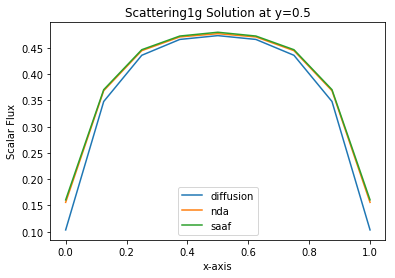

In [115]:
diff_points = plot_1d(grid, phi_diffusion[0], y)
nda_points = plot_1d(grid, phi_nda[0], y)
saaf_points = plot_1d(grid, phi_saaf[0][0], y)
plt.plot(diff_points[:, 0], diff_points[:, 1], label='diffusion')
plt.plot(nda_points[:, 0], nda_points[:, 1], label='nda')
plt.plot(saaf_points[:, 0], saaf_points[:, 1], label='saaf')
plt.legend()
plt.ylabel("Scalar Flux")
plt.xlabel("x-axis")
plt.title("Scattering1g Solution at y=0.5")
plt.show()

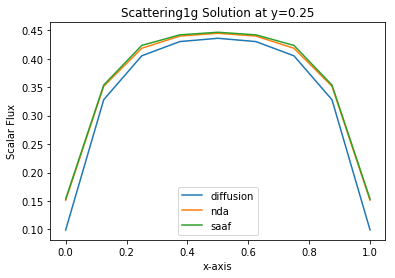

In [113]:
y = .25
diff_points = plot_1d(grid, phi_diffusion[0], y)
nda_points = plot_1d(grid, phi_nda[0], y)
saaf_points = plot_1d(grid, phi_saaf[0][0], y)
plt.plot(diff_points[:, 0], diff_points[:, 1], label='diffusion')
plt.plot(nda_points[:, 0], nda_points[:, 1], label='nda')
plt.plot(saaf_points[:, 0], saaf_points[:, 1], label='saaf')
plt.legend()
plt.ylabel("Scalar Flux")
plt.xlabel("x-axis")
plt.title("Scattering1g Solution at y=0.25")
plt.show()

## Compare SAAF & NDA as Mesh refines

In [ ]:
x = np.arange(4, 11)
err = []
nda = []
saaf = []
for mesh in x:
    # Choose Input
    mesh = 'symmetric-%s' % (str(mesh))
    mat = 'scattering1g'

    # Setup Problem
    nodefile = "../test/test_inputs/" + mesh + ".node"
    elefile = "../test/test_inputs/" + mesh + ".ele"
    matfile = "../test/test_inputs/" + mat + ".mat"
    grid = FEGrid(nodefile, elefile)
    mats = Materials(matfile)
    num_elts = grid.num_elts
    num_groups = mats.get_num_groups()
    source = np.ones((num_groups, num_elts))

    # Solve NDA
    op = NDA(grid, mats)
    solver = Solver(op)
    nda_phis = solver.solve(source)
    nda.append(nda_phis[0])

    # Solve SAAF
    op = SAAF(grid, mats)
    solver = Solver(op)
    saaf_phis = solver.solve(source)
    saaf.append(saaf_phis[0][0])

nda = np.array(nda)
saaf = np.array(saaf)

Runtime: 1.07855 seconds
Runtime: 6.3905 seconds
Runtime: 2.3794 seconds
Runtime: 12.76242 seconds
Runtime: 4.40129 seconds
Runtime: 26.34042 seconds
Runtime: 16.46481 seconds
Runtime: 59.17118 seconds
Runtime: 17.95479 seconds
Runtime: 104.02042 seconds
Runtime: 32.3342 seconds
Runtime: 244.99578 seconds
Runtime: 80.9501 seconds


In [ ]:
err = []
for i in range(7):
    err.append(np.mean(np.abs(nda[i] - saaf[i])))
err = np.array(err)
x = 2**x

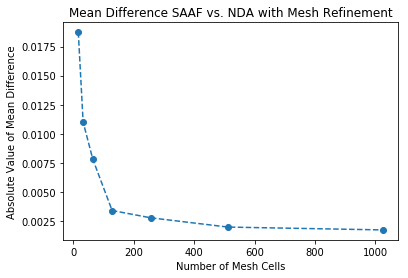

In [51]:
plt.plot(x, err, linestyle="--", marker='o')
plt.title("Mean Difference SAAF vs. NDA with Mesh Refinement")
plt.ylabel("Absolute Value of Mean Difference")
plt.xlabel("Number of Mesh Cells")
plt.show()

In [64]:
def calculate_absorption(grid, mats, phi, group_id):
    triang = grid.setup_triangulation()
    integral = 0
    for elt in range(grid.num_elts):
        midx = grid.get_mat_id(elt)
        sig_a = mats.get_siga(midx, group_id)
        g_nodes = grid.gauss_nodes(elt)
        phi_vals = grid.phi_at_gauss_nodes(triang, phi, g_nodes)
        integral += grid.gauss_quad(elt, sig_a*phi_vals[0])
    return integral

In [103]:
mesh = 'symmetric-10'
mat = 'scattering1g'
nodefile = "../test/test_inputs/" + mesh + ".node"
elefile = "../test/test_inputs/" + mesh + ".ele"
matfile = "../test/test_inputs/" + mat + ".mat"
grid = FEGrid(nodefile, elefile)
mats = Materials(matfile)

In [104]:
reference = np.array([saaf[-1]])
reference_abs = calculate_absorption(grid, mats, reference, 0)

In [105]:
nda_abs = []
x = np.arange(4, 11)
for i, mesh in enumerate(x):
    # Choose Input
    mesh = 'symmetric-%s' % (str(mesh))
    mat = 'scattering1g'

    # Setup Problem
    nodefile = "../test/test_inputs/" + mesh + ".node"
    elefile = "../test/test_inputs/" + mesh + ".ele"
    matfile = "../test/test_inputs/" + mat + ".mat"
    grid = FEGrid(nodefile, elefile)
    mats = Materials(matfile)

    flux = np.array([nda[i]])
    nda_abs.append(calculate_absorption(grid, mats, flux, 0))
    

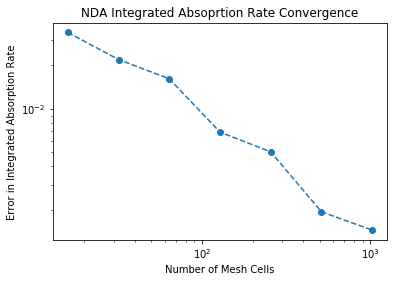

In [106]:
cells = 2**x
absorption_error = np.abs(nda_abs - reference_abs)
plt.loglog(cells, absorption_error, marker='o', linestyle="--")
plt.xlabel("Number of Mesh Cells")
plt.ylabel("Error in Integrated Absorption Rate")
plt.title("NDA Integrated Absoprtion Rate Convergence")
plt.show()